# Lab2: Linear regression using robust functions

**Carla Sendra Balcells**\
**Roxane Le Tensorer**\
**Rachel Trimble**

## Gradient Descent

### 1. Without Outliers

In [250]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [251]:
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
c = np.random.multivariate_normal(m,s,100)

In [252]:
c.shape

(100, 2)

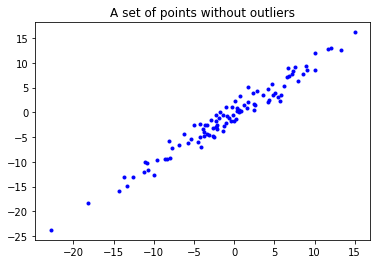

In [253]:
plt.plot(c[:,0], c[:,1], 'b.')
plt.title("A set of points without outliers")
plt.show()

In [254]:
def y_hat(w, x):
    return w[0]*x+w[1]

def lse(w, x, y):
    return (y_hat(w,x)-y)**2

def Q(w, x, y):
    return (1/2)*sum([lse(w, xi, yi) for xi, yi in zip(x, y)])

In [255]:
def gradQ(w, x, y):
    dQw0 = sum([(w[0]*xi + w[1] - yi)*xi for xi, yi in zip(x, y)])
    dQw1 = sum([(w[0]*xi + w[1] - yi) for xi, yi in zip(x, y)])
    return np.array([dQw0, dQw1])

In [256]:
def grad_desc(x, y, alpha, max_iters):
    w0 = np.random.randn(2)
    
    for it in range(max_iters):

        # alpha-backtracking
        w = w0 - alpha*gradQ(w0, x, y)
        
        while(Q(w, x, y) > Q(w0, x, y)):
            alpha = alpha/2
            w = w0 - alpha*gradQ(w, x, y)
            
        #print(it, Q(w, x, y))
        
        if(np.abs(Q(w, x, y) - Q(w0, x, y)) < 10e-4) | (np.linalg.norm(gradQ(w, x, y)) < 10e-5):
            break
        w0 = w 
        
    return w0

Text(0.5, 1.0, 'Regression without outliers')

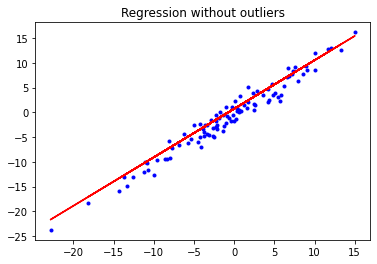

In [257]:
alpha = 1
max_iters = 100000

x, y = c[:, 0], c[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Regression without outliers")

### 2. With Outliers

Text(0.5, 1.0, 'Regression without outliers')

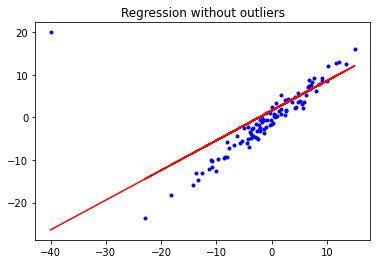

In [258]:
c_out = c.copy()
c_out[0]=[-40, 20]

x, y = c_out[:, 0], c_out[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Regression without outliers")

## Cauchy

## 1.

In [259]:
u=np.linspace(0,10,100)

In [260]:
def leastsquares(u):
    x=u
    y=.5*u**2
    return x,y

def cauchy(u):
    x=u
    y=.5*np.log(1+u**2)
    return x,y

Text(0.5, 1.0, 'Cauchy')

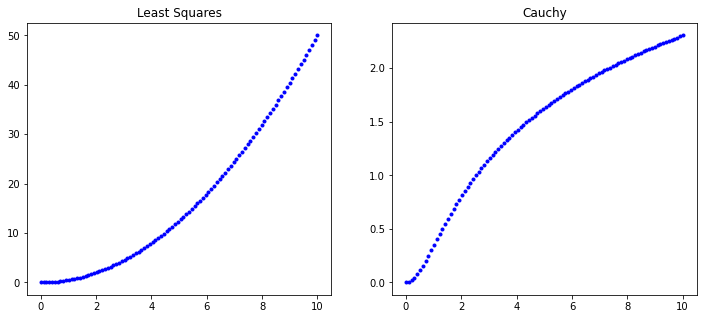

In [261]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (12, 5))
ax1.plot(leastsquares(u)[0], leastsquares(u)[1], 'b.')
ax1.set_title("Least Squares")

ax2.plot(cauchy(u)[0], cauchy(u)[1], 'b.')
ax2.set_title("Cauchy")

## 2.

In [262]:
def y_hat(w, x):
    return w[0]*x+w[1]

def lse(c, w, x, y):
    return np.log(1+((y_hat(w,x)-y)/c)**2)

def Q(c, w, x, y):
    return ((c**2)/2)*sum([lse(c, w, xi, yi) for xi, yi in zip(x, y)])

In [263]:
def gradQ(c, w, x, y):
    dQw0 = (c**2)*sum([(xi*(w[0]*xi + w[1] - yi))/((w[0]*xi + w[1] - yi)**2+(c**2)) for xi, yi in zip(x, y)])
    dQw1 = (c**2)*sum([(w[0]*xi + w[1] - yi)/((w[0]*xi + w[1] - yi)**2+(c**2)) for xi, yi in zip(x, y)])
    return np.array([dQw0, dQw1])

In [264]:
def grad_desc(c, x, y, alpha, max_iters):
    w0 = np.random.randn(2)
    
    for it in range(max_iters):

        # alpha-backtracking
        w = w0 - alpha*gradQ(c, w0, x, y)
        
        while(Q(c, w, x, y) > Q(c, w0, x, y)):
            alpha = alpha/2
            w = w0 - alpha*gradQ(c, w, x, y)
        
        if(np.abs(Q(c, w, x, y) - Q(c, w0, x, y)) < 10e-4) | (np.linalg.norm(gradQ(c, w, x, y)) < 10e-5):
            break
        w0 = w 
        
    return w0

## 3.

Text(0.5, 1.0, 'Cauchy without outliers')

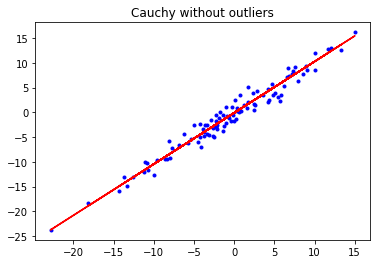

In [265]:
alpha = 1
max_iters = 100000
c1=1
x, y = c[:, 0], c[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(c1, x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Cauchy without outliers")

## 4.

Text(0.5, 1.0, 'Cauchy with outliers')

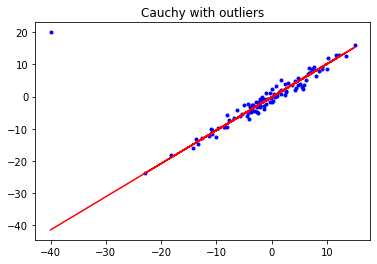

In [266]:
x, y = c_out[:, 0], c_out[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(c1, x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Cauchy with outliers")

## 5.

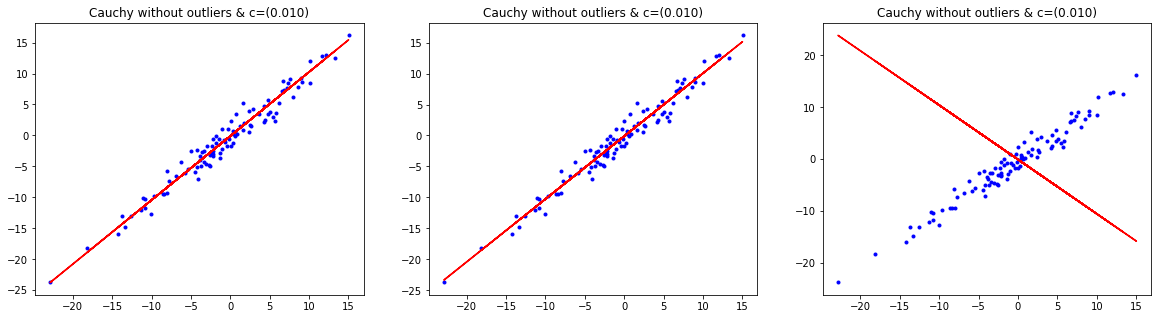

In [267]:
c1=np.array([1,100,1/100])

fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots * 10

for i in range(num_plots):
    c1_new=c1[i]
    ax = fig.add_subplot(base+(1+i))
    x, y = c[:, 0], c[:, 1]
    ax.plot(x, y, 'b.')
    w = grad_desc(c1_new, x, y, alpha, max_iters)
    ax.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
    ax.set_title("Cauchy without outliers & c=(%.3f)" % d)


## 6.

Text(0.5, 1.0, 'Cauchy with outliers 5 outliers')

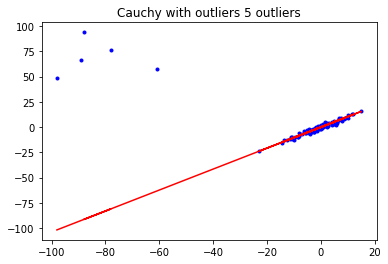

In [268]:
c1=1
c_out_5 = c.copy()
x = np.random.randint(-100, -60, 5)
y = np.random.randint(40, 100,5)
c_new=np.column_stack((x, y))
c_out_5[:5]=c_new

x, y = c_out_5[:, 0], c_out_5[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(c1, x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Cauchy with outliers 5 outliers")

Text(0.5, 1.0, 'Cauchy with outliers 15 outliers')

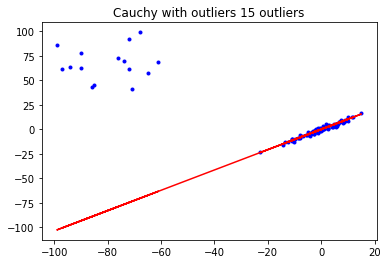

In [269]:
c_out_15 = c.copy()
x = np.random.randint(-100, -60, 15)
y = np.random.randint(40, 100,15)
c_new=np.column_stack((x, y))
c_out_15[:15]=c_new

x, y = c_out_15[:, 0], c_out_15[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(c1, x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Cauchy with outliers 15 outliers")